<a href="https://colab.research.google.com/github/erisaf2/BDI-Final-Project/blob/main/Final_Case_Study_Covid_Farimani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I chose the COVID-19 Dataset in order to compare COVID cases at the height of the Pandemic in the US on Jan 8, 2021 versus April 30, 2021. I'm curious to see how the US has improved after the vaccine has been rolled out and fully administered to over 30% of the population, as of May 2, 2021. This data includes the 50 states, US Territories and two cruise ships that had the initial large COVID outbreaks, Diamond Princess and Grand Princess.

Some questions I have when looking at these datasets include:
1. States/Territories with the most vs. least cases 
2. States/Territories with the most vs. least deaths 
3. How cases have ranged as a whole over the last ~4 months
4. Cases in the US shown geographically 
5. Fatality rate by State/Territory
5. Top 10 highest death rate
6. Bottom 10 lowest confirmed case rate

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
#height of COVID-19 Pandemic in US
df1 = pd.read_csv('https://github.com/erisaf2/BDI-Final-Project/raw/main/01-08-2021.csv')

In [4]:
#Pandemic today after vaccine rollout
df2 = pd.read_csv('https://github.com/erisaf2/BDI-Final-Project/raw/main/04-30-2021.csv')

In [5]:
df1.shape


(58, 18)

In [6]:
df2.shape

(58, 18)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     float64
 10  Incident_Rate         56 non-null     float64
 11  Total_Test_Results    56 non-null     float64
 12  People_Hospitalized   0 non-null      float64
 13  Case_Fatality_Ratio   57 non-null     float64
 14  UID                   58 non-null     float64
 15  ISO3                  58 

In [8]:
#Cleaning the df1 data to remove columns with missing values
df1.drop(columns=['People_Hospitalized','Hospitalization_Rate'], inplace=True)

In [9]:
df1.head(3)

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2021-01-09 05:30:45  32.3182  -86.9023   
1          Alaska             US  2021-01-09 05:30:45  61.3707 -152.4044   
2  American Samoa             US  2021-01-09 05:30:45 -14.2710 -170.1320   

   Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
0     394287    5191   211684.0  177412.0   1.0    8041.446529   
1      49660     223     7165.0   42251.0   2.0    6785.501917   
2          0       0        NaN       0.0  60.0       0.000000   

   Total_Test_Results  Case_Fatality_Ratio         UID ISO3   Testing_Rate  
0           1944233.0             1.316554  84000001.0  USA   39652.450397  
1           1337749.0             0.449244  84000002.0  USA  182866.262499  
2              2140.0                  NaN        16.0  ASM    3846.084722

In [10]:
df1.sample(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
46  South Carolina             US  2021-01-09 05:30:45  33.8569  -80.9450   
32          Nevada             US  2021-01-09 05:30:45  38.3135 -117.0554   
23           Maine             US  2021-01-09 05:30:45  44.6939  -69.3819   
48       Tennessee             US  2021-01-09 05:30:45  35.7478  -86.6923   
51         Vermont             US  2021-01-09 05:30:45  44.0459  -72.7107   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
46     344176    5695   164575.0  173906.0  45.0    6684.698354   
32     243661    3394        NaN  240267.0  32.0    7910.670758   
23      28407     426    11690.0   16291.0  23.0    2113.282726   
48     640606    7618   559625.0   73363.0  47.0    9380.431660   
51       8619     156     5778.0    2685.0  50.0    1381.274349   

    Total_Test_Results  Case_Fatality_Ratio         UID ISO3   Testing_Rate  
46           3398114.0             1.654677  84000045.0  USA   65999.276713  
32           2198483.0             1.392919  84000032.0  USA   71375.703049  
23           1172721.0             1.499630  84000023.0  USA   87242.265357  
48           5875526.0             1.189186  84000047.0  USA   86035.675764  
51            743851.0             1.809955  84000050.0  USA  119208.992466

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             0 non-null      float64
 8   Active                0 non-null      float64
 9   FIPS                  58 non-null     float64
 10  Incident_Rate         56 non-null     float64
 11  Total_Test_Results    56 non-null     float64
 12  People_Hospitalized   0 non-null      float64
 13  Case_Fatality_Ratio   57 non-null     float64
 14  UID                   58 non-null     float64
 15  ISO3                  58 

In [12]:
#Cleaning the df2 data to remove columns with missing values
df2.drop(columns=['Recovered','Active','People_Hospitalized','Hospitalization_Rate'], inplace=True)

In [13]:
df2.head(3)

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2021-05-01 04:30:31  32.3182  -86.9023   
1          Alaska             US  2021-05-01 04:30:31  61.3707 -152.4044   
2  American Samoa             US  2021-05-01 04:30:31 -14.2710 -170.1320   

   Confirmed  Deaths  FIPS  Incident_Rate  Total_Test_Results  \
0     527922   10896   1.0   10766.919869           2498822.0   
1      68148     347   2.0    9315.626516           2091352.0   
2          0       0  60.0       0.000000              2140.0   

   Case_Fatality_Ratio         UID ISO3   Testing_Rate  
0             2.063941  84000001.0  USA   50963.241240  
1             0.509186  84000002.0  USA  285881.524718  
2                  NaN        16.0  ASM    3846.084722

In [14]:
df2.sample(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
4        Arkansas             US  2021-05-01 04:30:31  34.9697  -92.3731   
49          Texas             US  2021-05-01 04:30:31  31.0545  -97.5635   
40           Ohio             US  2021-05-01 04:30:31  40.3888  -82.7649   
3         Arizona             US  2021-05-01 04:30:31  33.7298 -111.4312   
17       Illinois             US  2021-05-01 04:30:31  40.3495  -88.9861   

    Confirmed  Deaths  FIPS  Incident_Rate  Total_Test_Results  \
4      335725    5739   5.0   11124.811287           2969063.0   
49    2893928   50219  48.0    9980.479641          23001820.0   
40    1072312   19284  39.0    9160.422958          12356841.0   
3      862497   17324   4.0   11849.574588           9144036.0   
17    1334955   24291  17.0   10534.831576          22558270.0   

    Case_Fatality_Ratio         UID ISO3   Testing_Rate  
4              1.709435  84000005.0  USA   98384.885168  
49             1.735323  84000048.0  USA   79327.887985  
40             1.791980  84000039.0  USA  105712.509945  
3              2.008587  84000004.0  USA  125627.030148  
17             1.819612  84000017.0  USA  178019.165517

In [15]:
#Top 5 States/Territories with most confirmed cases on Jan 8 2021
df1_sorted_by_cases = df1.sort_values('Confirmed', ascending=False)
df1_sorted_by_cases.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
5      California             US  2021-01-09 05:30:45  36.1162 -119.6816   
49          Texas             US  2021-01-09 05:30:45  31.0545  -97.5635   
11        Florida             US  2021-01-09 05:30:45  27.7663  -81.6868   
36       New York             US  2021-01-09 05:30:45  42.1657  -74.9481   
17       Illinois             US  2021-01-09 05:30:45  40.3495  -88.9861   

    Confirmed  Deaths  Recovered     Active  FIPS  Incident_Rate  \
5     2653925   29306        NaN  2590723.0   6.0    6630.426742   
49    1932554   30128  1536690.0   357064.0  48.0    6633.352510   
11    1449252   22666        NaN  1426586.0  12.0    6747.694136   
36    1101445   39282   108144.0   954019.0  36.0    5661.919687   
17    1017322   19108        NaN   998214.0  17.0    8028.222621   

    Total_Test_Results  Case_Fatality_Ratio         UID ISO3   Testing_Rate  
5           35027330.0             1.110989  84000006.0  USA   88649.352885  
49          14532743.0             1.541282  84000048.0  USA   50120.025668  
11          16592877.0             1.563979  84000012.0  USA   77256.169959  
36          26816135.0             3.566406  84000036.0  USA  137846.921702  
17          13922611.0             1.878265  84000017.0  USA  109870.641323

In [16]:
#Top 5 States/Territories with most confirmed cases on May 2 2021
df2_sorted_by_cases = df2.sort_values('Confirmed', ascending=False)
df2_sorted_by_cases.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
5      California             US  2021-05-01 07:30:34  36.1162 -119.6816   
49          Texas             US  2021-05-01 04:30:31  31.0545  -97.5635   
11        Florida             US  2021-05-01 04:30:31  27.7663  -81.6868   
36       New York             US  2021-05-01 04:30:31  42.1657  -74.9481   
17       Illinois             US  2021-05-01 04:30:31  40.3495  -88.9861   

    Confirmed  Deaths  FIPS  Incident_Rate  Total_Test_Results  \
5     3742115   62078   6.0    9470.778194          59795197.0   
49    2893928   50219  48.0    9980.479641          23001820.0   
11    2233518   35161  12.0   10399.224090          22617595.0   
36    2048150   52258  36.0   10528.406599          50991319.0   
17    1334955   24291  17.0   10534.831576          22558270.0   

    Case_Fatality_Ratio         UID ISO3   Testing_Rate  
5              1.658901  84000006.0  USA  151333.416497  
49             1.735323  84000048.0  USA   79327.887985  
11             1.574243  84000012.0  USA  105307.160619  
36             2.551473  84000036.0  USA  262118.174662  
17             1.819612  84000017.0  USA  178019.165517

In [17]:
#Top 3 States/Territories with most overall deaths on Jan 8 2021
df1_sorted_by_deaths = df1.sort_values('Deaths', ascending=False)
df1_sorted_by_deaths.head(3)

Province_State Country_Region          Last_Update      Lat     Long_  \
36       New York             US  2021-01-09 05:30:45  42.1657  -74.9481   
49          Texas             US  2021-01-09 05:30:45  31.0545  -97.5635   
5      California             US  2021-01-09 05:30:45  36.1162 -119.6816   

    Confirmed  Deaths  Recovered     Active  FIPS  Incident_Rate  \
36    1101445   39282   108144.0   954019.0  36.0    5661.919687   
49    1932554   30128  1536690.0   357064.0  48.0    6633.352510   
5     2653925   29306        NaN  2590723.0   6.0    6630.426742   

    Total_Test_Results  Case_Fatality_Ratio         UID ISO3   Testing_Rate  
36          26816135.0             3.566406  84000036.0  USA  137846.921702  
49          14532743.0             1.541282  84000048.0  USA   50120.025668  
5           35027330.0             1.110989  84000006.0  USA   88649.352885

In [18]:
#Top 3 States/Territories with most overall deaths on May 2 2021
df2_sorted_by_deaths = df2.sort_values('Deaths', ascending=False)
df2_sorted_by_deaths.head(3)

Province_State Country_Region          Last_Update      Lat     Long_  \
5      California             US  2021-05-01 07:30:34  36.1162 -119.6816   
36       New York             US  2021-05-01 04:30:31  42.1657  -74.9481   
49          Texas             US  2021-05-01 04:30:31  31.0545  -97.5635   

    Confirmed  Deaths  FIPS  Incident_Rate  Total_Test_Results  \
5     3742115   62078   6.0    9470.778194          59795197.0   
36    2048150   52258  36.0   10528.406599          50991319.0   
49    2893928   50219  48.0    9980.479641          23001820.0   

    Case_Fatality_Ratio         UID ISO3   Testing_Rate  
5              1.658901  84000006.0  USA  151333.416497  
36             2.551473  84000036.0  USA  262118.174662  
49             1.735323  84000048.0  USA   79327.887985

In [19]:
#Grouping by Case Fatality Ratio and Deaths - this shows the top 5 fatality ratios and 
#how many deaths occurred in these states/territories
df1_fatality_by_cases = df1.groupby('Case_Fatality_Ratio', as_index=False).agg({'Deaths': ['sum']})
df1_fatality_by_cases.tail(5)

Case_Fatality_Ratio Deaths
                          sum
52            2.912621      3
53            3.069992   6324
54            3.093722  12985
55            3.566406  39282
56            3.824176  19756

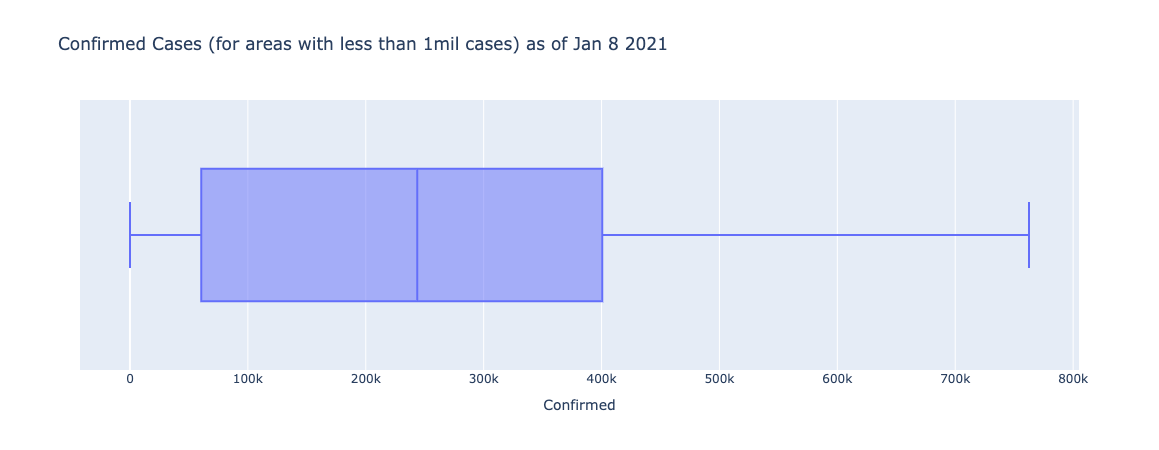

In [20]:
fig1 = px.box(df1[df1['Confirmed']<1000000],
             x='Confirmed',
             orientation='h',
             title='Confirmed Cases (for areas with less than 1mil cases) as of Jan 8 2021')
fig1.show()

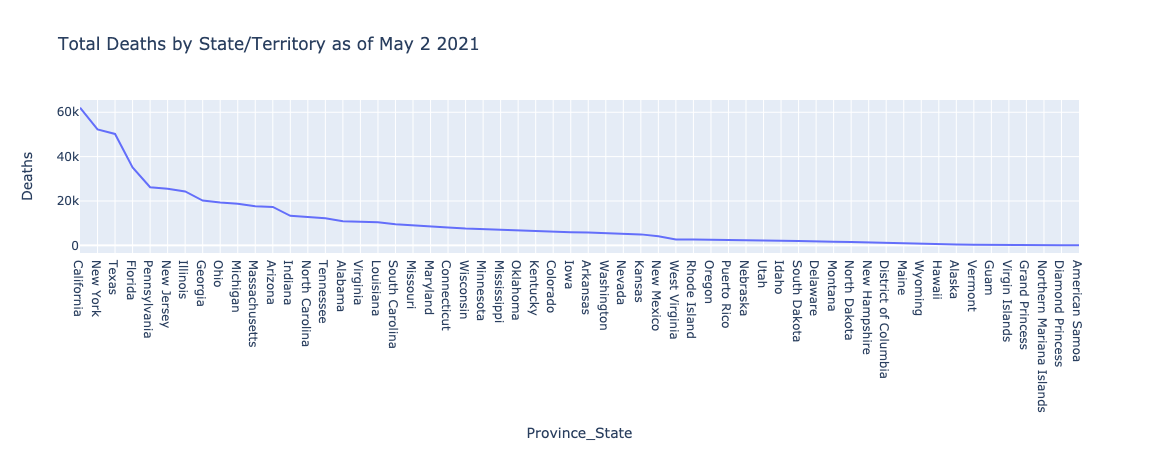

In [21]:
fig2 = px.line(df2_sorted_by_deaths, y='Deaths', x='Province_State', title='Total Deaths by State/Territory as of May 2 2021')
fig2.show()

In [22]:
df2_sorted_by_case_fatality = df2.sort_values('Case_Fatality_Ratio', ascending=False)
df2_sorted_by_case_fatality.head(5)

Province_State Country_Region          Last_Update      Lat    Long_  \
13  Grand Princess             US  2021-05-01 04:30:31      NaN      NaN   
34      New Jersey             US  2021-05-01 04:30:31  40.2989 -74.5210   
25   Massachusetts             US  2021-05-01 04:30:31  42.2302 -71.5301   
36        New York             US  2021-05-01 04:30:31  42.1657 -74.9481   
7      Connecticut             US  2021-05-01 04:30:31  41.5978 -72.7554   

    Confirmed  Deaths     FIPS  Incident_Rate  Total_Test_Results  \
13        103       3  99999.0            NaN                 NaN   
34     997223   25554     34.0   11227.219864          13555157.0   
25     688973   17610     25.0    9995.976788          21264961.0   
36    2048150   52258     36.0   10528.406599          50991319.0   
7      339233    8097      9.0    9514.886179           8021441.0   

    Case_Fatality_Ratio         UID ISO3   Testing_Rate  
13             2.912621  84099999.0  USA            NaN  
34             2.562516  84000034.0  USA  152610.527359  
25             2.555978  84000025.0  USA  308523.057589  
36             2.551473  84000036.0  USA  262118.174662  
7              2.386855  84000009.0  USA  224987.245066

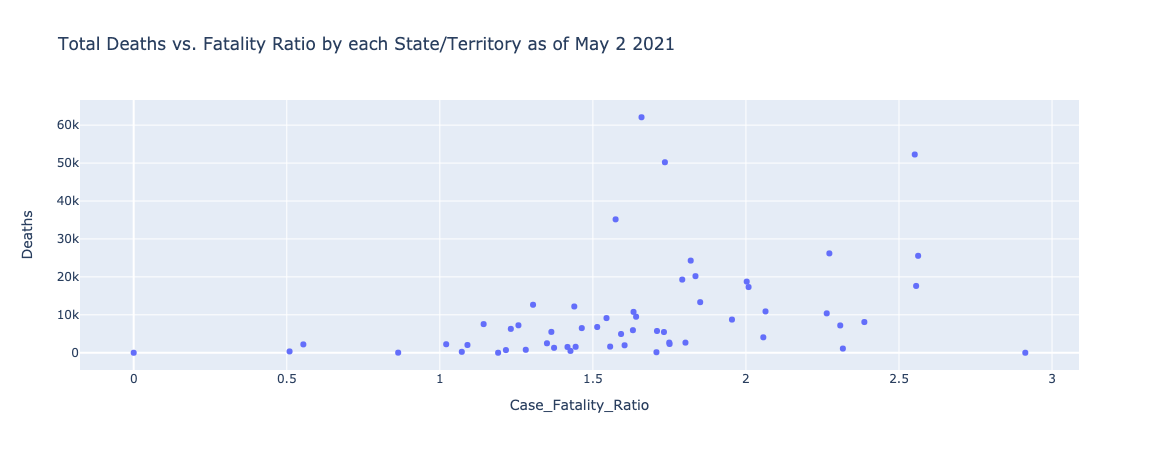

In [23]:
fig3 = px.scatter(df2_sorted_by_case_fatality, y='Deaths', x='Case_Fatality_Ratio', title='Total Deaths vs. Fatality Ratio by each State/Territory as of May 2 2021')
fig3.show()

In [24]:
US_deaths_over_time = pd.read_csv('https://github.com/erisaf2/BDI-Final-Project/blob/main/time_series_covid19_deaths_US.csv?raw=true')
US_deaths_over_time.head(3)

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   

         Lat      Long_  ... 4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  \
0  32.539527 -86.644082  ...     107      107      107      107      107   
1  30.727750 -87.722071  ...     303      305      305      305      305   
2  31.868263 -85.387129  ...      56       56       56       56       56   

   4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  
0      107      107      107     107     107  
1      305      305      305     306     306  
2       56       56       56      56      56  

[3 rows x 479 columns]

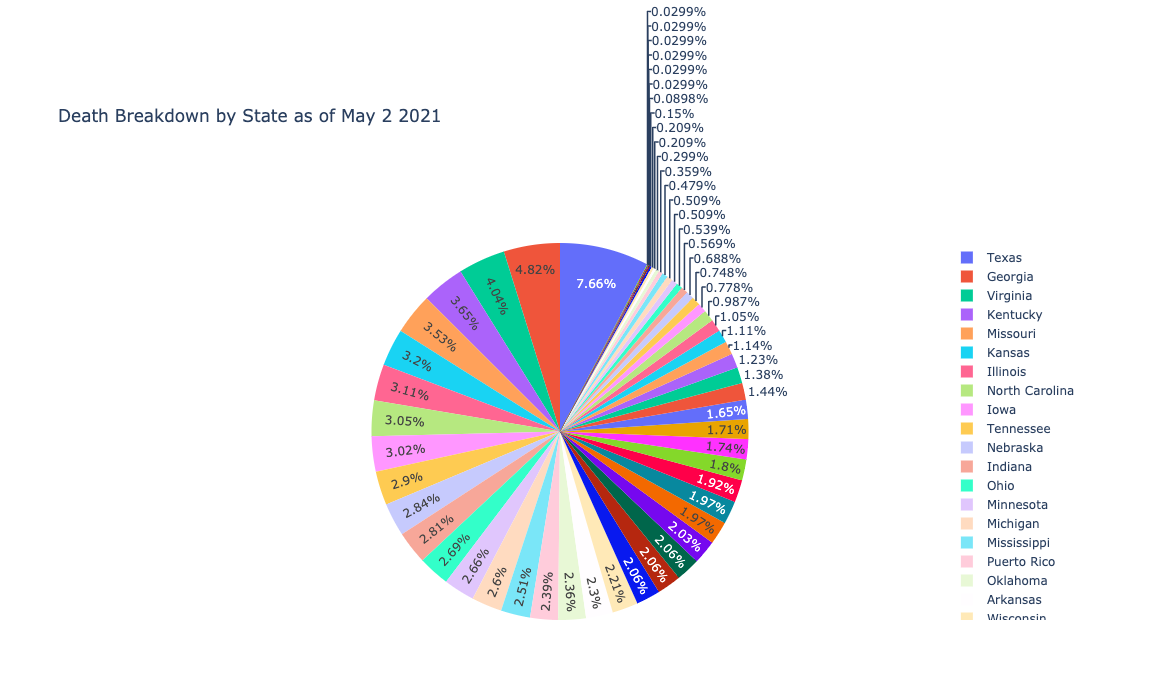

In [25]:
fig4 = px.pie(
    US_deaths_over_time,
    names='Province_State',
    title='Death Breakdown by State as of May 2 2021',
    width=800,
    height=700
)

fig4.show()

In [26]:
us_cases_over_time = pd.read_csv('https://github.com/erisaf2/BDI-Final-Project/blob/main/time_series_covid19_confirmed_US.csv?raw=true')
us_cases_over_time.head(3)

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   

         Lat      Long_  ... 4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  \
0  32.539527 -86.644082  ...    6835     6876     6879     6882     6889   
1  30.727750 -87.722071  ...   20833    20838    20847    20863    20875   
2  31.868263 -85.387129  ...    2292     2296     2296     2296     2297   

   4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  
0     6890     6897     6904    6907    6909  
1    20897    20921    20941   20966   20983  
2     2298     2299     2300    2302    2302  

[3 rows x 478 columns]

In [27]:
us_cases_over_time.drop(columns=['code3','FIPS'], inplace=True)
us_cases_over_time.rename(columns={'Admin2': 'County'}, inplace=True)

In [28]:
us_cases_over_time.sample(5)

UID iso2 iso3   County Province_State Country_Region        Lat  \
455   84013091   US  USA    Dodge        Georgia             US  32.172651   
1739  84031043   US  USA   Dakota       Nebraska             US  42.390401   
2300  84041015   US  USA    Curry         Oregon             US  42.459113   
2896  84048391   US  USA  Refugio          Texas             US  28.323898   
1776  84031119   US  USA  Madison       Nebraska             US  41.916760   

           Long_           Combined_Key  1/22/20  ...  4/23/21  4/24/21  \
455   -83.169489     Dodge, Georgia, US        0  ...     2093     2094   
1739  -96.566564   Dakota, Nebraska, US        0  ...     3896     3898   
2300 -124.157282      Curry, Oregon, US        0  ...      607      615   
2896  -97.157663     Refugio, Texas, US        0  ...      646      646   
1776  -97.600548  Madison, Nebraska, US        0  ...     4198     4204   

      4/25/21  4/26/21  4/27/21  4/28/21  4/29/21  4/30/21  5/1/21  5/2/21  
455      2094     2094     2096     2097     2098     2099    2099    2100  
1739     3903     3903     3905     3906     3904     3911    3913    3914  
2300      615      615      619      629      632      634     634     634  
2896      648      648      650      651      651      651     656     661  
1776     4204     4205     4209     4215     4218     4219    4222    4222  

[5 rows x 476 columns]

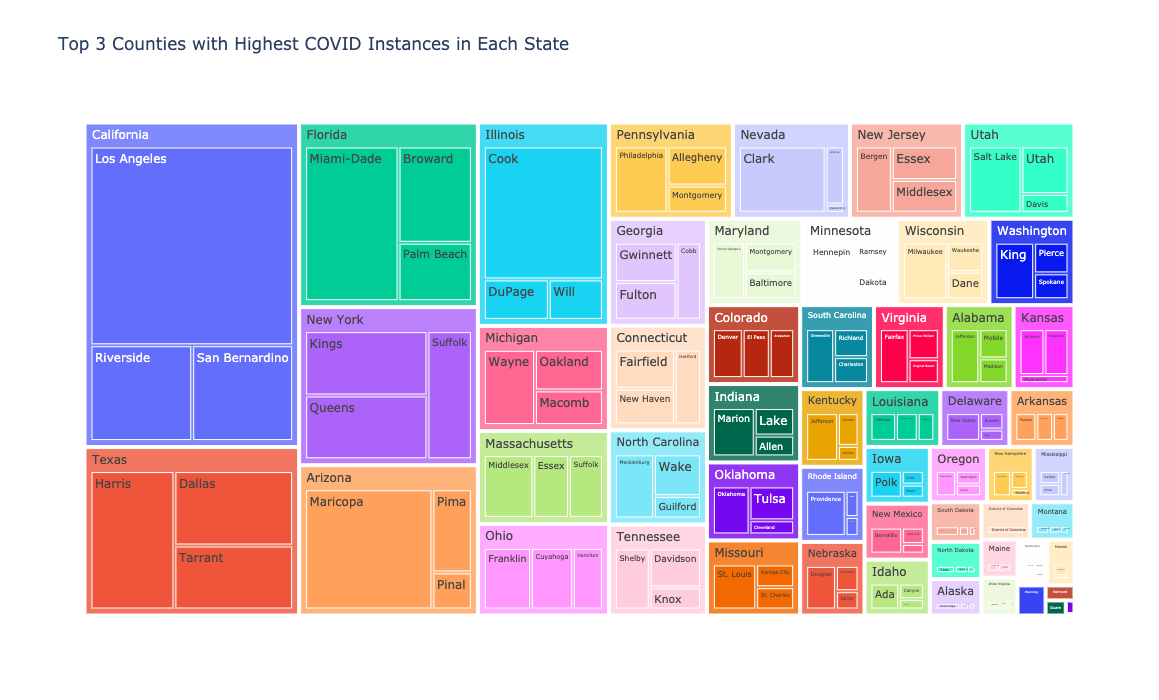

In [29]:
df_0521 = us_cases_over_time.sort_values(['Province_State', '5/2/21'], ascending=[True, False]) \
  .groupby('Province_State').head(3)

fig5 = px.treemap(
    df_0521,
    path=['Province_State', 'County'],
    title='Top 3 Counties with Highest COVID Instances in Each State',
    values='5/2/21',
    height=700
)

fig5.show()


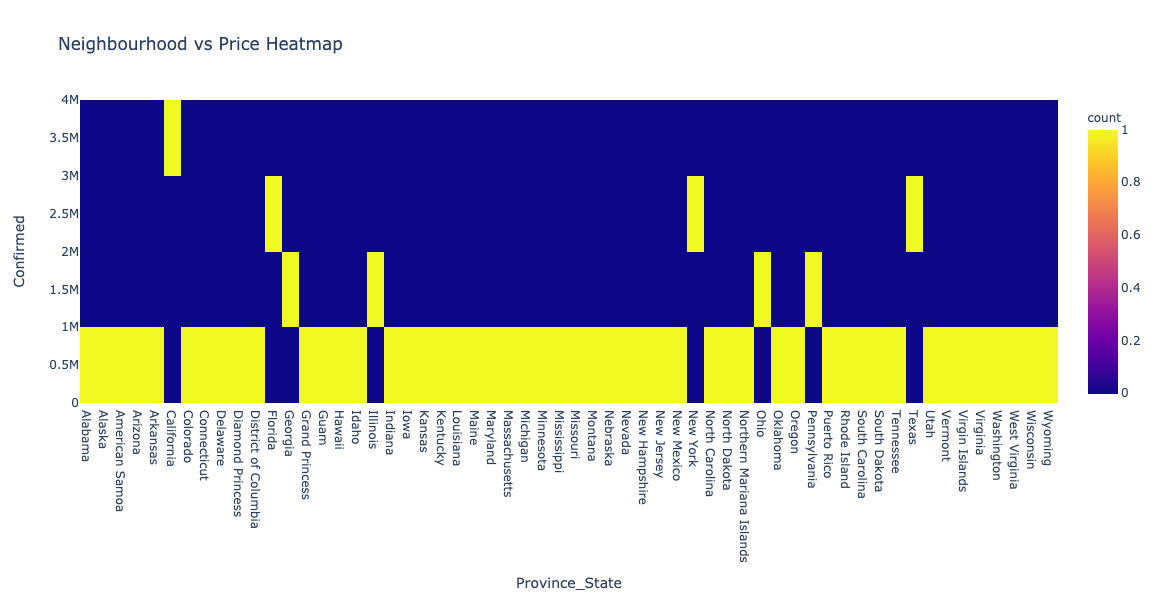

In [30]:


fig6 = px.density_heatmap(
    df2,
    x='Province_State',
    y='Confirmed',
    title='Neighbourhood vs Price Heatmap',
    height=600
)
fig6.show()

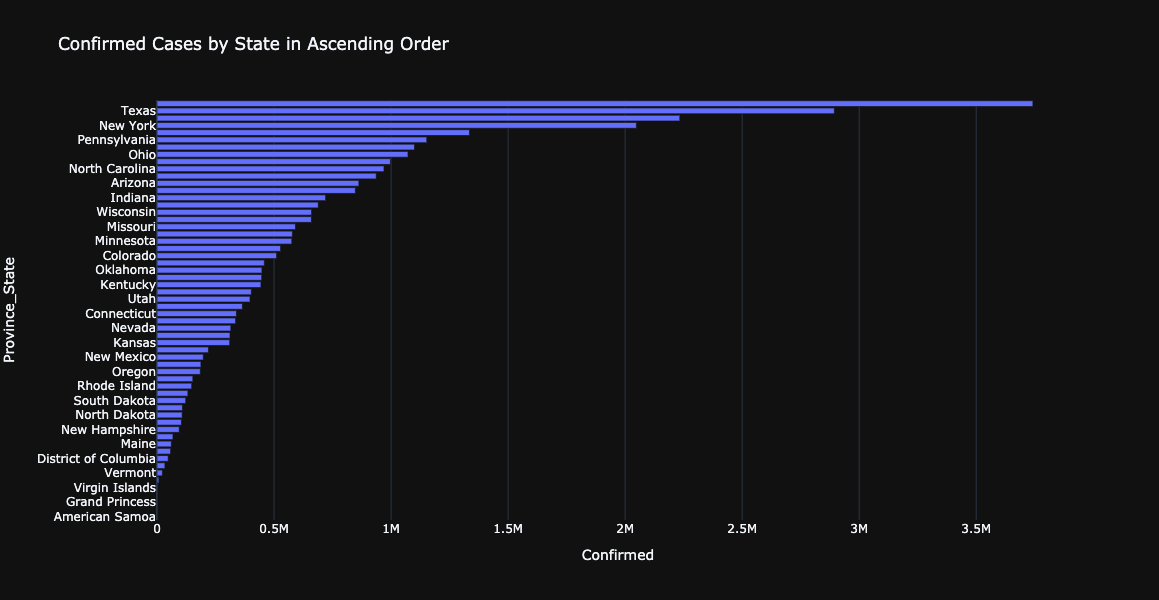

In [31]:
fig6 = px.bar(
    df2,
    x='Confirmed',
    y='Province_State',
    template='plotly_dark',
    title='Confirmed Cases by State in Ascending Order',
    height=600
)

fig6.update_yaxes(categoryorder='total ascending')

fig6.show()